In [1]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths#All these packages need to be installed from pip


## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?*** 
<200 words

The question I am interested in exploring is – how do retail investors and professional investors behave differently on social media. I will be focusing on text posts of investors and may aid the study by exploiting additional information which is generated by interacted activities (e.g., follows, comments, and likes). Below is a tentative list of questions that I would like to explore with the project:

- Do retail investors generally post differently with professional investors? (e.g., topic-wise and semantical-wise)

- Do retail and professional investors respond differrently to earnings news in terms of how they post? 

- Which group is more likely to trigger or lead a new discussion?

- Are retail investors more likely to form 'echo chambers' - interacting with people with similar beliefs? (e.g., measured with follower network or like/conment of posts)


## <font color="red"> ***Why?***</font>
<font color="red"> <200 words

With the democratization of content creation on social media, both amateur and professional investors are able to post opinions on the same platform and to interact with one another. User generated content on such platforms provides us with the opportunity to study and further our understanding on various aspects of investor behavior - such as attention, belief formation, and decision making dynamics. Possibly, those behavioral insights might help to explain anomalies and inefficiencies in the financial market. 

To be more specific, for instance, by studying the differences between posts of retail and professional investors, we would be able to tell whether the retail investors are the 'noise traders' and whether professional investors are actually more 'professional' in terms of preceiving and responding to market information. It would also be interesting to explore who react faster to market news and who is leading the direction of discussion. This could also lead to practical implications that we may try to build trading strategies leveraging the systematic biases we found in social media activities of investors.



## <font color="red"> ***How?***</font>
<font color="red"> <400 words

- Data Collection

I would scrap posts and user profiles from Twitter and build the text corpus by my self. Firstly, I will input S&P 500 stocks into search and scrap posts together with users mentioning the stocks. Secondly, with a list of users stored, I will scrape their profiles and followers/followings. I expect professional investors to indicate their job title or company names or experiences in their profile self introduction. Though I may need to manually check and label the investors as retail vs. professional and screen out ambigious ones. I hope to build a dataset of posts from at least 1000 investors.

- Exploratory analysis

I will start by performing some descriptive analysis, for example comparing post frequency, post length, most common ngrams and the engagement level (likes, comments, and reposts) of tweets from the two groups.

- Topic Modelling

I will build topic models on posts of the two groups respectively and compare them to see if there are some systematical differences.

- Word Embedding

With the topics I get from the previous analysis, I could focus on specific words and projections to look into more details of the differences.

- Classification

I may use different algorithms to try to build a classification model to predict whether a piece of content is produced by a retail or professional investor, and by inspecting feature importance, we may be able to get some further insights about the differences between the groups.

- Extension

I could possibly combine computational content analysis 1. with social network analysis to study how investors' network position and connections might influence how and what they posts, and does same type of investors tend to cluster with each other. 2. with financial analysis to build trading strategies based on features extracted by text.



## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
<300 words

I hope to analyze retail and professional investor behavior on social media. I choose Twitter because 1. availability - the data is relatively easy to collect, 2. large scale - Twitter has a large user base, and I am able to obtain posts from both retail and institutional investor, 3. high frequency - users post frequently about stocks.

There are some limitations as well. Twitter is not a vertical platform exculsively about investment, so their might be a selection bias - people who post on twitter may differ from the population. Also, compared with data from platforms such as Seeking Alpha and Stocktwit, Twitter data require more effort in data cleaning - there are not much additional investment related information we can get (e.g., Stocktwit users would indicate their investment philosophy and years of experience in their profile).

With funding and support, I may be able to scale up the project by obtaining data from Seeking alpha and Stocktwit.

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

As shown below, we can see that the words - US, China, trade, tarriff, trump - have high similarity and locate near each other in the visualization. This indicates that the news tend to talk about the US-China trade war.

CEO, plan, sources, exclusive are close in the plots, suggesting there may be news about individual firm level announcement.

In [63]:
data = pandas.read_csv('reuters_headlines.csv')

In [5]:
#Apply our functions, notice each row is a list of lists now
data['tokenized_texts'] = data['Headlines'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
data['normalized_texts'] = data['tokenized_texts'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

data[:100:10]

,Headlines,Time,Description,tokenized_texts,normalized_texts
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...,"[[TikTok, considers, London, and, other, locat...","[[tiktok, consider, london, location, headquar..."
10,Delta will avoid pilot furloughs if they agree...,Jul 17 2020,Delta Air Lines told pilots on Friday it would...,"[[Delta, will, avoid, pilot, furloughs, if, th...","[[delta, avoid, pilot, furlough, agree, reduce..."
20,Senator asks Twitter about claim worker was pa...,Jul 17 2020,"Senator Josh Hawley, a Republican who closely ...","[[Senator, asks, Twitter, about, claim, worker...","[[senator, ask, twitter, claim, worker, pay, h..."
30,As big U.S. banks let customers delay payments...,Jul 17 2020,Major U.S. bank executives this week said they...,"[[As, big, U.S., banks, let, customers, delay,...","[[big, u.s, bank, let, customer, delay, paymen..."
40,Italy plans listing for Autostrade by early 20...,Jul 17 2020,The Italian government plans to list Autostrad...,"[[Italy, plans, listing, for, Autostrade, by, ...","[[italy, plan, list, autostrade, early, source]]"
50,Volkswagen expects single-digit sales decline ...,Jul 17 2020,Volkswagen AG said on Friday it expects its C...,"[[Volkswagen, expects, single, digit, sales, d...","[[volkswagen, expect, single, digit, sale, dec..."
60,Jailed executive in Wirecard scandal offers co...,Jul 16 2020,The former head of a key subsidiary of Wirecar...,"[[Jailed, executive, in, Wirecard, scandal, of...","[[jail, executive, wirecard, scandal, offer, c..."
70,"Trump will remain on Twitter, his account secu...",Jul 16 2020,U.S. President Donald Trump will not stop usin...,"[[Trump, will, remain, on, Twitter, his, accou...","[[trump, remain, twitter, account, secure, whi..."
80,"U.S. Senator Warner asks for probe of hacks, b...",Jul 16 2020,U.S. Senator Mark Warner called on Thursday fo...,"[[U.S., Senator, Warner, asks, for, probe, of,...","[[u.s, senator, warner, ask, probe, hack, well..."
90,U.S. retail sales snap back; high unemployment...,Jul 16 2020,U.S. retail sales rose more than expected in J...,"[[U.S., retail, sales, snap, back, high, unemp...","[[u.s, retail, sale, snap, high, unemployment,..."


In [7]:
newsW2V = gensim.models.word2vec.Word2Vec(data['normalized_texts'].sum(), sg=0)

In [8]:
newsW2V.most_similar('crisis')

[('august', 0.986937403678894),
 ('july', 0.9860748052597046),
 ('aeromexico', 0.9858297109603882),
 ('summer', 0.9856972694396973),
 ('haul', 0.9854860305786133),
 ('grind', 0.9850243330001831),
 ('october', 0.984967827796936),
 ('come', 0.9845616817474365),
 ('guidance', 0.9839579463005066),
 ('window', 0.9832344651222229)]

In [9]:
newsW2V.most_similar('news')

[('lack', 0.998043954372406),
 ('shoot', 0.9978938102722168),
 ('lock', 0.997843325138092),
 ('spotlight', 0.9978203177452087),
 ('upend', 0.9977190494537354),
 ('crypto', 0.9977096915245056),
 ('mountain', 0.997650682926178),
 ('treatment', 0.9975749254226685),
 ('george', 0.9975690841674805),
 ('waste', 0.997567892074585)]

In [15]:
newsW2V.most_similar('u.s')

[('good', 0.9551334381103516),
 ('chinese', 0.9530252814292908),
 ('threat', 0.9521088600158691),
 ('china', 0.946515679359436),
 ('phase', 0.9382161498069763),
 ('progress', 0.9376564025878906),
 ('xi', 0.936676025390625),
 ('trump', 0.9364795088768005),
 ('salvo', 0.9361155033111572),
 ('mnuchin', 0.9344295263290405)]

In [23]:
newsW2V.most_similar('profit')

[('beat', 0.9913992285728455),
 ('estimate', 0.983407735824585),
 ('revenue', 0.9815203547477722),
 ('quarterly', 0.9740420579910278),
 ('forecast', 0.9667630791664124),
 ('quarter', 0.9666562080383301),
 ('top', 0.9626672267913818),
 ('miss', 0.9597364664077759),
 ('loss', 0.9366308450698853),
 ('share', 0.932826042175293)]

Find which word best matches the result of a semantic **equation** (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [18]:
newsW2V.most_similar(positive=['trump', 'u.s'], negative = ['china'])

[('official', 0.9312334060668945),
 ('xi', 0.917510986328125),
 ('white', 0.9132617115974426),
 ('progress', 0.9120706915855408),
 ('salvo', 0.909552812576294),
 ('mnuchin', 0.9018320441246033),
 ('kudlow', 0.8948299884796143),
 ('phase', 0.8947107791900635),
 ('talk', 0.8854867815971375),
 ('good', 0.8843270540237427)]

In [19]:
numWords = 50
targetWords = newsW2V.wv.index2word[:numWords]

In [20]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(newsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.16084881, -0.01498836,  0.2922471 , ...,  0.15168773,
         0.01693313,  0.00723484],
       [ 0.24324013,  0.16193922,  0.39715603, ..., -0.01172664,
         0.0982629 , -0.10249026],
       [ 0.6685417 ,  0.09363532,  0.6916219 , ..., -0.12377447,
        -0.02634538,  0.17773189],
       ...,
       [ 0.91736716,  1.1085875 ,  1.1864315 , ...,  0.04702606,
         0.5434266 , -0.02464854],
       [ 0.38525382,  0.303066  ,  0.44946665, ...,  0.07953578,
         0.075263  ,  0.0938183 ],
       [ 0.17403801,  0.81968325,  1.0880052 , ...,  0.69871557,
         0.15817171, -0.9480999 ]], dtype=float32)

In [21]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

In [33]:
pcaWords1 = sklearn.decomposition.PCA(n_components = 2).fit(wordsSubMatrix)
reducedPCA_data1 = pcaWords1.transform(wordsSubMatrix)

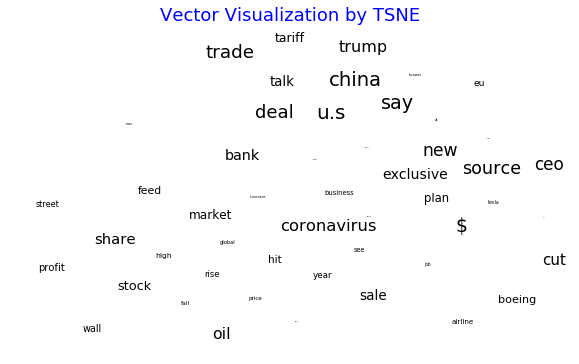

In [42]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by TSNE', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()

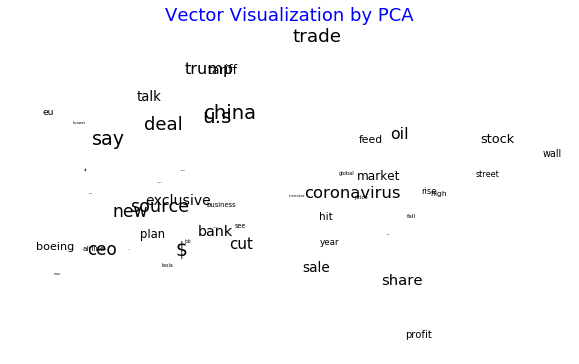

In [41]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data1[:, 0], reducedPCA_data1[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data1[:, 0][i],reducedPCA_data1[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by PCA', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()

In [146]:
#different specification
newsW2V = gensim.models.word2vec.Word2Vec(data['normalized_texts'].sum(), sg=0, hs=1, negative=0)

In [159]:
numWords = 50
targetWords = newsW2V.wv.index2word[:numWords]

In [160]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(newsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-4.8376776e-02, -1.7049672e-01,  2.2712997e-01, ...,
        -2.5360808e-01, -3.7147194e-02, -3.8972840e-01],
       [ 2.4496906e-01,  3.0736494e-01,  2.2825785e-01, ...,
        -6.6033441e-01,  5.9594098e-04, -3.0189958e-01],
       [-8.6105376e-02, -3.6015651e-01,  2.4670510e-01, ...,
         4.1058194e-02, -2.2799845e-01,  1.9060451e-01],
       ...,
       [ 1.0512587e+00,  9.3930399e-01,  7.5538003e-01, ...,
        -3.4705797e-01,  7.1831286e-01, -2.8394538e-01],
       [ 1.5086843e-01,  4.7958154e-02, -1.7548269e-02, ...,
        -3.6293864e-01, -3.3209676e-01, -1.1114730e-02],
       [-1.9279681e-01,  5.1606345e-01,  1.0325435e+00, ...,
         1.2375154e-01,  2.8857970e-01, -3.7015873e-01]], dtype=float32)

In [161]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

In [33]:
pcaWords1 = sklearn.decomposition.PCA(n_components = 2).fit(wordsSubMatrix)
reducedPCA_data1 = pcaWords1.transform(wordsSubMatrix)

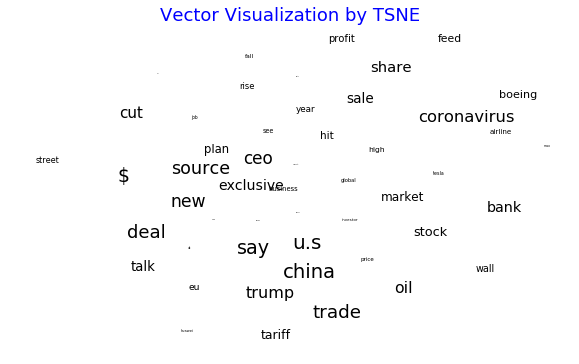

In [162]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by TSNE', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()

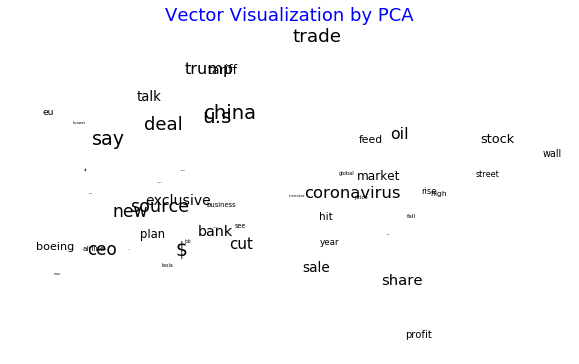

In [163]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data1[:, 0], reducedPCA_data1[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (reducedPCA_data1[:, 0][i],reducedPCA_data1[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.title('Vector Visualization by PCA', size = 18, color = "blue")
plt.xticks(())
plt.yticks(())
plt.show()

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

The result suggests that the documents tend to talk intensively about coronavirus, company CEOs, andd the market. Besides, it is interesting to find that the cosine similary between CEO and trade, u.s, and market are negative. Perhaps the company and macro level news does not tend to interact with each other.

In [64]:
df = data.copy()

In [66]:
df['tokenized_words'] = df['Description'].apply(lambda x: lucem_illud.word_tokenize(x))
df['normalized_words'] = df['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))


In [81]:
keywords = ['trade', 'coronavirus', 'ceo', 'u.s', 'trump', 'stock', 'market', 'china']


In [82]:
taggedDocs = []
for index, row in df.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['Time'])
    docKeywords.append(row['Headlines']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
df['TaggedAbstracts'] = taggedDocs

In [83]:
df.head()

,Headlines,Time,Description,tokenized_words,normalized_words,TaggedAbstracts
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...,"[TikTok, has, been, in, discussions, with, the...","[tiktok, discussions, uk, government, past, mo...","([tiktok, discussions, uk, government, past, m..."
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...,"[Walt, Disney, has, become, the, latest, compa...","[walt, disney, latest, company, slash, adverti...","([walt, disney, latest, company, slash, advert..."
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...,"[Former, Wirecard, chief, operating, officer, ...","[wirecard, chief, operating, officer, jan, mar...","([wirecard, chief, operating, officer, jan, ma..."
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...,"[Twitter, Inc, said, on, Saturday, that, hacke...","[twitter, inc, said, saturday, hackers, able, ...","([twitter, inc, said, saturday, hackers, able,..."
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...,"[A, battle, in, the, U.S., Congress, over, a, ...","[battle, u.s, congress, new, coronavirus, aid,...","([battle, u.s, congress, new, coronavirus, aid..."


In [84]:
newsD2V = gensim.models.doc2vec.Doc2Vec(df['TaggedAbstracts'], size = 100) #Limiting to 100 dimensions

/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [175]:
newsD2V.most_similar(positive = ['stock','increase'], negative = ['pandemic'], topn = 1)

[('raise', 0.794655978679657)]

In [78]:
newsD2V.docvecs.most_similar([newsD2V['coronavirus'] ], topn=5 )

[('United Airlines warns of lower bookings, furloughs: source',
  0.7616276144981384),
 ('As millions lose jobs, Fed policymakers say recession is here',
  0.7612459659576416),
 ('Samsung says Japanese curbs cloud outlook as profit halves, shares fall',
  0.7606761455535889),
 ('Hong Kong banks compare pandemic stress test with epidemic reality',
  0.7517496943473816),
 ('Factbox: Apple, Starbucks warn of hit from virus; firms restrict travel, airlines cancel flights',
  0.7439374923706055)]

In [85]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = newsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, newsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

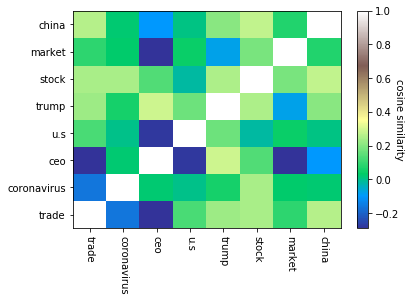

In [86]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [87]:
targetDocs = df['Headlines'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = newsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, newsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

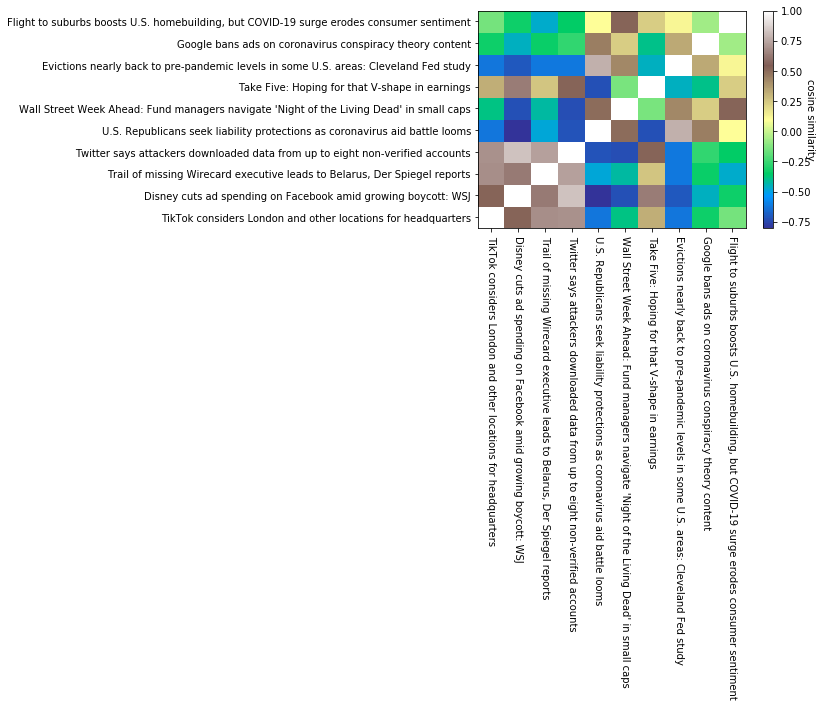

In [88]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [89]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = newsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, newsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

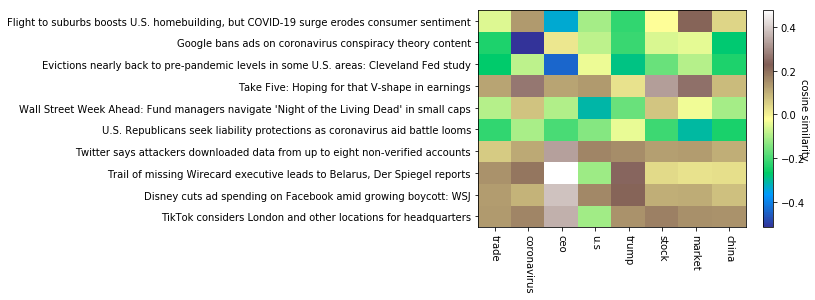

In [90]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

I chose trend(up vs. down), connectedness and trust as dimensions, and project companies, countries and industries on to them.

Here are some interesting things I find: UK and Candana are most associated with trust, whereas europe is the least. Finance is projected the farthest from upward trends, but is projected highest regarding connectedness and trust. Apple is most related to an increasing trend, but is least related to trust and connectedness.

In [91]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [118]:
Trend = dimension(newsW2V, ['increase','soar', 'rise', 'raise'], ['decline', 'cut', 'down'])
Connecedness = dimension(newsW2V, ['close','cooperate','alliance', 'communication'], ['separate', 'war', 'break', 'battle'])
Trust = dimension(newsW2V, ['convince', 'trust', 'believe'], ['doubt', 'conspiracy', 'uncertain', 'confusion'])


Here we have some words.

In [111]:
Companies = ['apple', 'boeing', 'facebook', 'tiktok', 'google', 'gm', 'amazon']
Country = ['china', 'u.s', 'uk', 'russia', 'europe', 'japan', 'canada', 'australia', 'singapore', 'italy']
Industries = ['food', 'oil', 'energy', 'agriculture', 'service', 'education', 'medical', 'finance']

Define a function to project words in a word list to each of the three dimensions.

In [119]:
def makeDF(model, word_list):
    a = []
    b = []
    c = []
    for word in word_list:
        a.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), Trend.reshape(1,-1))[0][0])
        b.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), Proximity.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(newsW2V[word].reshape(1,-1), Trust.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Trend': a, 'Connecedness': b, 'Trust': c}, index = word_list)
    return df

Get the projections.

In [121]:
Comdf = makeDF(newsW2V, Companies) 
Coudf = makeDF(newsW2V, Country)
Inddf = makeDF(newsW2V, Industries)

Define some useful functions for plotting.

In [113]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

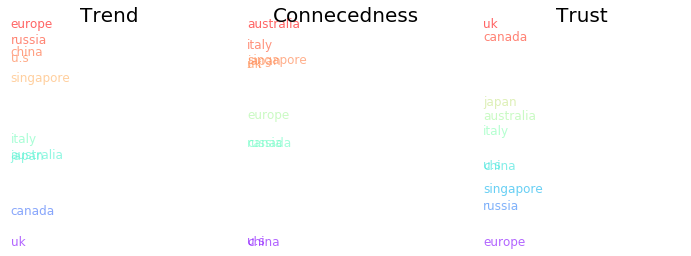

In [122]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Coudf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Coudf, 'Connecedness')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Coudf, 'Trust')
plt.show()

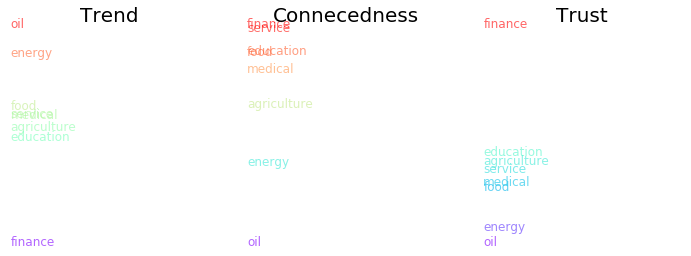

In [123]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Inddf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Inddf, 'Connecedness')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Inddf, 'Trust')
plt.show()

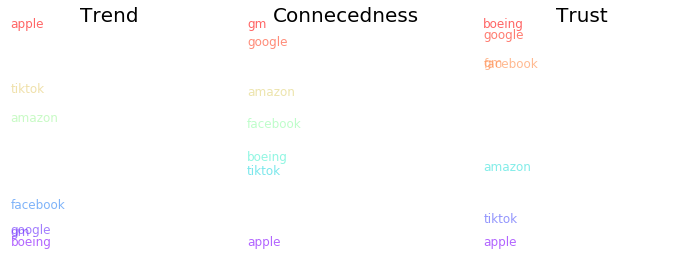

In [124]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Comdf, 'Trend')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Comdf, 'Connecedness')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Comdf, 'Trust')
plt.show()



## <font color="red">*Exercise 4a*</font>

<font color="red">**Do only 4a or 4b.** Construct cells immediately below this that calculate the scores for a small sample of documents from outside your corpus to identify which are *closest* to your corpus. Then calculate the scores for a few phrases or sentences to identify the ones most likely to have appeared in your corpus. Interrogate patterns associated with these document/phrase scores (e.g., which companies produced job ads most or least likely to find jobseekers in the resume corpus?) What do these patterns suggest about the boundaries of your corpus?

For this exercise, I used the Covid fake vs. real news dataset which is available at https://arxiv.org/abs/2011.03327 to compare with my corpus.

I find real news has higher likelihood scores on average than fake news.

News about facts and statistics has higher likelihood scores than news with opinions and preferences.

In [128]:
fakenews = pandas.read_csv("fakenews.csv", index_col = 'id')

In [131]:
fn = fakenews[:100]

In [132]:
fn

,tweet,label
id,,
1,The CDC currently reports 99031 deaths. In gen...,real
2,States reported 1121 deaths a small rise from ...,real
3,Politically Correct Woman (Almost) Uses Pandem...,fake
4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
5,Populous states can generate large case counts...,real
...,...,...
96,COVID-19 update: There are no new cases of COV...,real
97,Compare the number of completed tests reported...,real
98,All 12 cases in the community are Auckland bas...,real


In [133]:
fn['tokenized_texts'] = fn['tweet'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
fn['normalized_texts'] = fn['tokenized_texts'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
fn

,tweet,label,tokenized_texts,normalized_texts
id,,,,
1,The CDC currently reports 99031 deaths. In gen...,real,"[[The, CDC, currently, reports, 99031, deaths]...","[[cdc, currently, report, death], [general, di..."
2,States reported 1121 deaths a small rise from ...,real,"[[States, reported, 1121, deaths, a, small, ri...","[[state, report, death, small, rise, tuesday],..."
3,Politically Correct Woman (Almost) Uses Pandem...,fake,"[[Politically, Correct, Woman, Almost, Uses, P...","[[politically, correct, woman, use, pandemic, ..."
4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,"[[IndiaFightsCorona, We, have, 1524, COVID, te...","[[indiafightscorona, covid, test, laboratory, ..."
5,Populous states can generate large case counts...,real,"[[Populous, states, can, generate, large, case...","[[populous, state, generate, large, case, coun..."
...,...,...,...,...
96,COVID-19 update: There are no new cases of COV...,real,"[[COVID-19, update, There, are, no, new, cases...","[[covid-19, update, new, case, covid-19, repor..."
97,Compare the number of completed tests reported...,real,"[[Compare, the, number, of, completed, tests, ...","[[compare, numb, complete, test, report, new, ..."
98,All 12 cases in the community are Auckland bas...,real,"[[All, 12, cases, in, the, community, are, Auc...","[[case, community, auckland, base], [connect, ..."


In [152]:
def newsprob(news, model):
    scores = model.score(news, len(news))
    score = scores.mean()
    return score

In [145]:
data['tokenized_texts'] = data['Headlines'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
data['normalized_texts'] = data['tokenized_texts'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [146]:
newsW2V = gensim.models.word2vec.Word2Vec(data['normalized_texts'].sum(), sg=0, hs=1, negative=0)

In [147]:
newsW2V.score('rua')

array([-9.87307, -9.87307,  0.     ], dtype=float32)

In [148]:
fn['likelihood'] = fn['normalized_texts'].apply(lambda x: newsprob(x, newsW2V))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
for news in fn.sort_values(by = 'likelihood', ascending = False)['tweet'][:5]:
    print (news + '\n\n')

📢#CoronaVirusUpdates: 📍#COVID19 India Tracker (As on 7 September 2020 08:00 AM) ➡️Confirmed cases: 4204613 ➡️Recovered: 3250429 (77.3%)👍 ➡️Active cases: 882542 (21.0%) ➡️Deaths: 71642 (1.7%) #IndiaFightsCorona #IndiaWillWin #StaySafe Via @MoHFW_INDIA https://t.co/WVQslxqBPC


As at 11:50 pm 19th April the breakdown of cases by state is: Lagos- 376 FCT- 88 Kano- 36 Osun- 20 Oyo- 16 Edo- 15 Ogun- 12 Kwara- 9 Katsina- 12 Bauchi- 7 Kaduna- 6 Akwa Ibom- 9 Delta- 4 Ekiti- 3 Ondo- 3 Enugu- 2 Rivers-2 Niger- 2 Benue- 1 Anambra- 1 Borno- 1 Jigawa- 2


According to the State Health Department #Haryana #COVID19 #RecoveryRate in #Gurugram is 86.7%: https://t.co/oZ9KCDajIJ #COVID19 #Covid_19 #COVIDー19 #CoronaUpdates #CoronavirusIndia #CoronaVirusUpdates #coronavirus #COVIDUpdates https://t.co/2Sp8yRRRWj


Did You Already Have Coronavirus? Here’s A Simple Test https://t.co/PNbf76rsFF


As of 18 August 2020 8AM till now there have been a total of 4687 #COVID19 positive cases &amp; 17 #COVID_19 relate

In [150]:
for news in fn.sort_values(by = 'likelihood')['tweet'][:5]:
    print (news + '\n\n')

Scientists at AstraZeneca complain their work on a coronavirus vaccine keeps being delayed by Noddy Holder ringing up to ask if it will be ready by Christmas https://t.co/2lmYzTnAPx


Multiple posts shared thousands of times on Facebook Twitter and YouTube claim that salt is an effective remedy against the novel coronavirus.


"The most important consequence of seeing COVID-19
as a syndemic is to underline its social origins. The
vulnerability of older citizens; Black, Asian, and minority
ethnic communities; and key workers who are commonly
poorly paid with fewer welfare protections..."


Football player Cristiano Ronaldo turned all his hotels into hospitals to help coronavirus patients and is paying doctors and the staff.


Our total number of confirmed cases of COVID-19 is now 1431 which is the number we report to the World Health Organization.




In [153]:
newsprob([['stock', 'investor']], newsW2V)

-8.267707

In [155]:
newsprob([['movie', 'star']], newsW2V)

-18.589882

In [157]:
newsprob([['increase', 'decrease']], newsW2V)

-7.757412

In [158]:
newsprob([['like', 'hate']], newsW2V)

-18.794928

In [156]:
fn.groupby("label")[['likelihood']].mean().sort_values('likelihood', ascending = False)

,likelihood
label,
real,-32.340474
fake,-41.324780
